# Bank Marketing

# Objective

The business problem is a binary classification problem. The classification goal is to predict if the client contacted through the marketing campaign will subscribe a term deposit.

# Source of the Dataset

__Source:__ Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012 https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
Dataset: Term - deposit marketing campaign data of a Porteguese banking institution.

# Dataset Description

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

Attribute/Features Description:

Dataset have 17 attributes including one dependent attribute and there are 45211 instances/datapoints. So we have 16 predictor/independent attributes and 1 dependent attribute.

bank client attributes:

age: age of client (numeric)

job : type of job (categorical: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services")

marital : marital status (categorical: "married", "divorced", "single")

education: client highest education (categorical: "unknown", "secondary", "primary", "tertiary")

default: has credit in default? (binary/2-categories: "yes", "no")

balance: average yearly balance, in euros (numeric)

housing: has housing loan? (binary/2-categories: "yes", "no")

loan: has personal loan? (binary/2-categories: "yes", "no")

related with the last contact of the current campaign:


contact: contact communication type (categorical: "unknown", "telephone", "cellular")

day: last contact day of the month (numeric)

month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

duration: last contact duration, in seconds (numeric)

other attributes:

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign ( categorical: 'unknown","other", "failure", "success")

Output variable (desired target):
y: has the client subscribed a term deposit? (binary: "yes", "no")

In [237]:
!pip install prettytable

In [338]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt 
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
import warnings
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_precision_recall_curve


In [339]:
data = pd.read_csv('bank-full.csv')

In [340]:
data.shape

(45211, 17)

In [341]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [342]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [344]:
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

In [345]:
data['Target'].value_counts()/ len(data)

no     0.883015
yes    0.116985
Name: Target, dtype: float64

In [346]:
print('Categorical features:', cat)
print('Numerical features:', num)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


Text(0.5, 0, 'Target class')

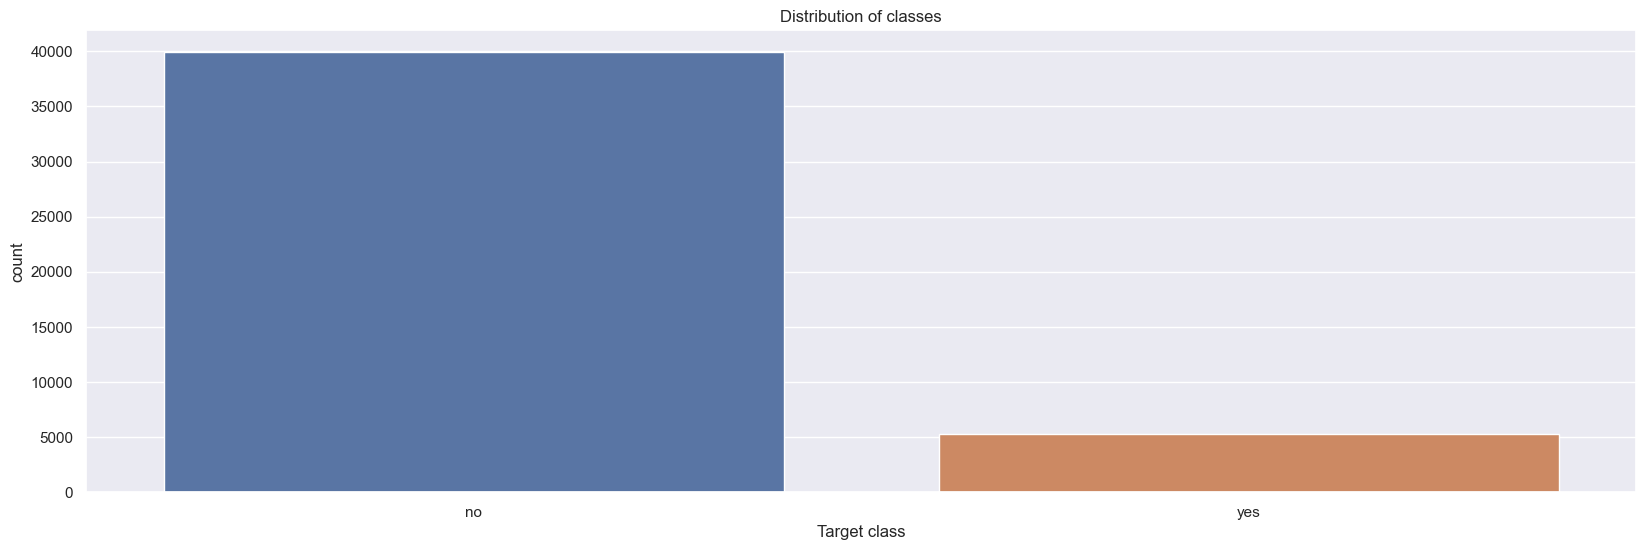

In [347]:
from matplotlib import pyplot as plt
sns.countplot(x=data['Target'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [348]:
data.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

## Data Analysis

# Pdays

Text(0.5, 0, 'y: target variable')

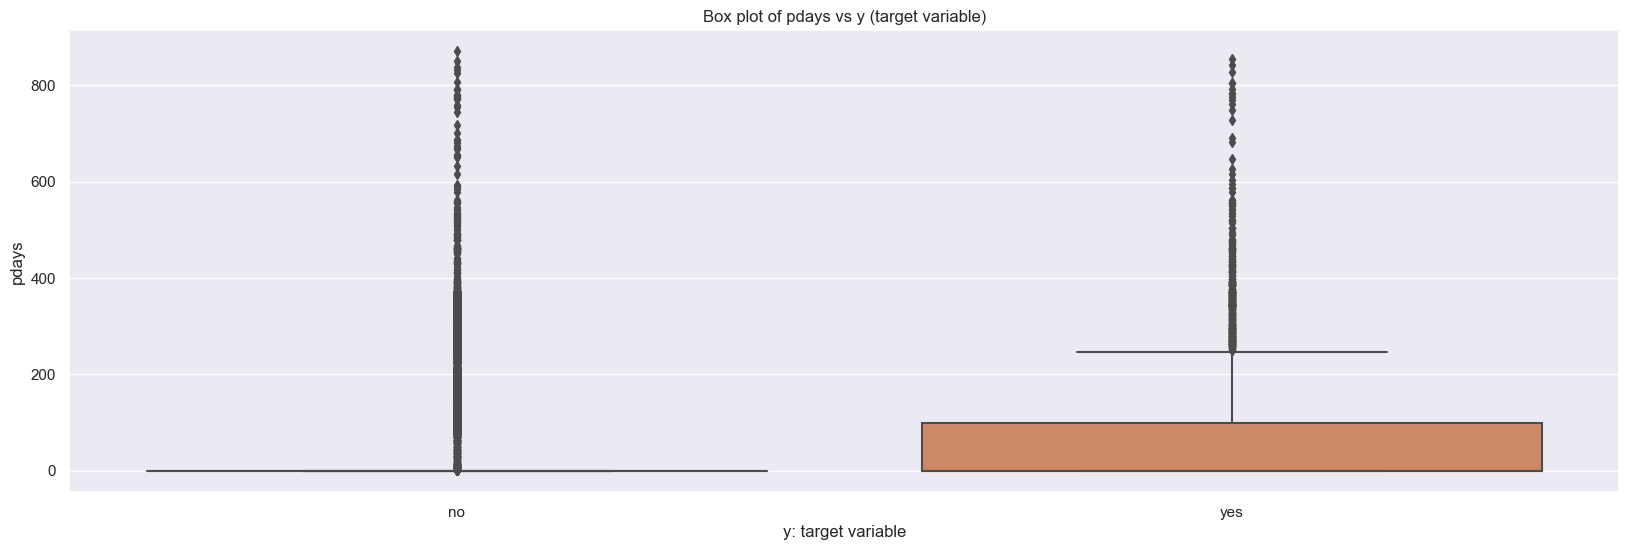

In [349]:
sns.boxplot(y=data['pdays'], x=data['Target'])
plt.title('Box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable')

C:\Users\maity\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\maity\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'PDF of pdays for target variable y')

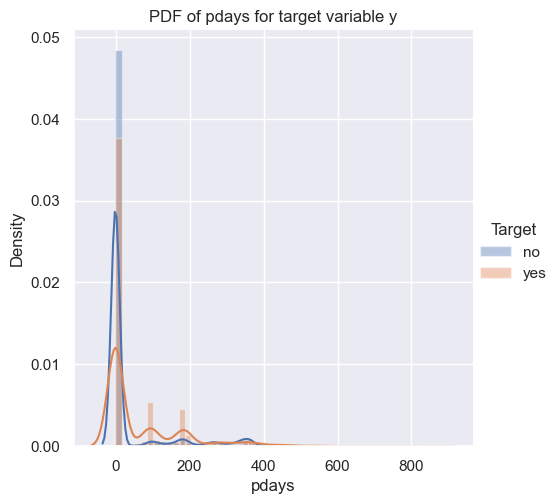

In [350]:
sns.FacetGrid(data, hue='Target',height=5) \
.map(sns.distplot, 'pdays') \
.add_legend()
plt.title('PDF of pdays for target variable y')

In [351]:
data.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [352]:
for x in range(95, 101 , 1):
    print("{}% of pdays are less than equal to {}".format(x, data.pdays.quantile(x/100)))
iqr = data.pdays.quantile(0.75) - data.pdays.quantile(0.25)
print('IQR {}'.format(iqr))

95% of pdays are less than equal to 317.0
96% of pdays are less than equal to 337.0
97% of pdays are less than equal to 349.0
98% of pdays are less than equal to 360.0
99% of pdays are less than equal to 370.0
100% of pdays are less than equal to 871.0
IQR 0.0


Observation:

The attribute pdays seems to be important feature as there is a clear distinction in quartile ranges of pdays for target variable yes and no.
75% clients contacted through campaign are not previously contacted.
Mean of pdays is 40.20
There are outliers as we can see from boxplot.

# Duration

Text(0.5, 0, 'y:target variable')

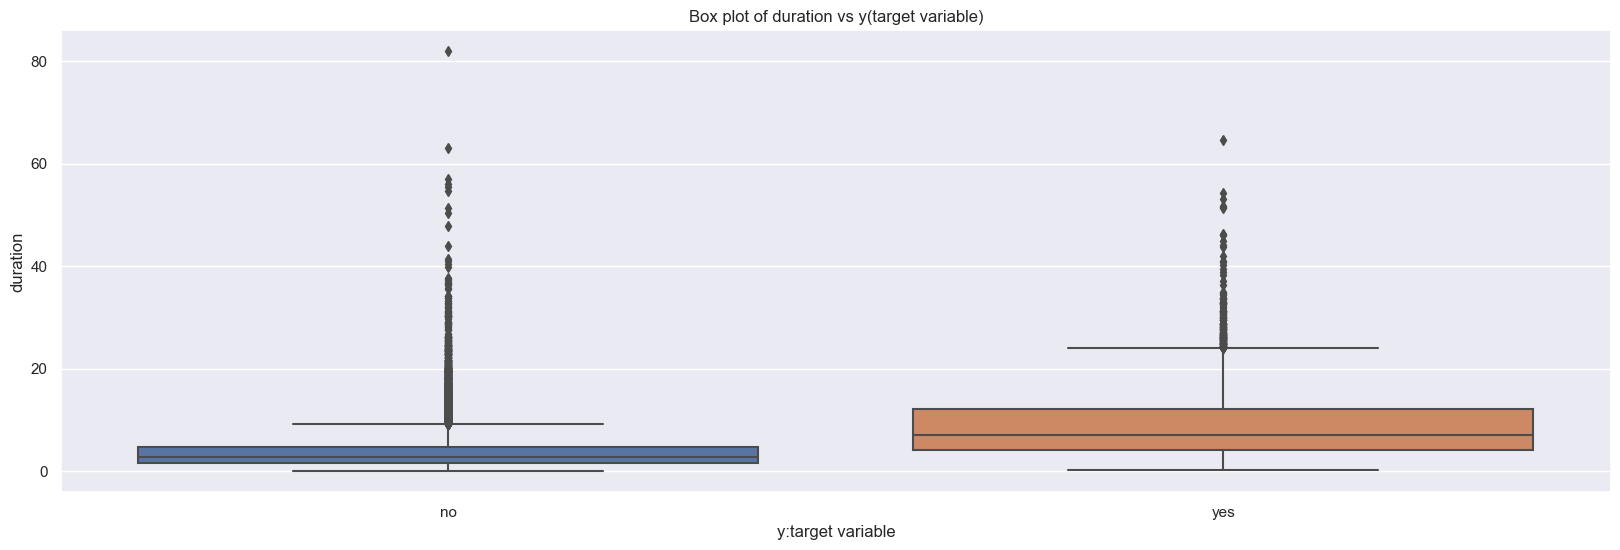

In [353]:
# converting call duration from seconds to minute
data['duration'] = data['duration']/60
sns.boxplot(y=data['duration'], x=data['Target'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

C:\Users\maity\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\maity\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'PDF of duration for target variable y')

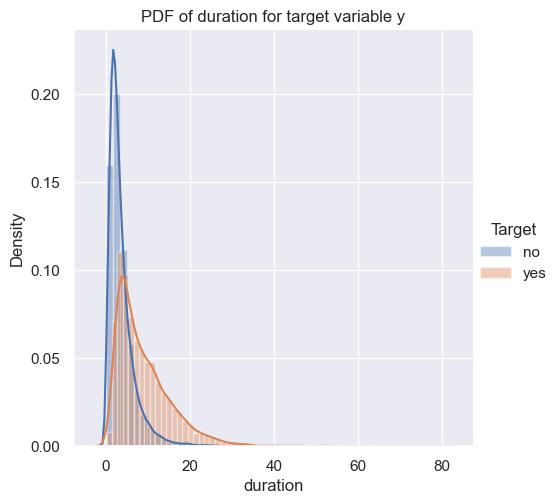

In [354]:
sns.FacetGrid(data, hue='Target',height=5) \
.map(sns.distplot, 'duration') \
.add_legend()
plt.title('PDF of duration for target variable y')

In [355]:
data.duration.describe()

count    45211.000000
mean         4.302718
std          4.292130
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [356]:
for x in range(95, 101 , 1):
    print("{}% of calls have duration less than equal to {}".format(x, data.duration.quantile(x/100)))
iqr = data.duration.quantile(0.75) - data.duration.quantile(0.25)
print('IQR {}'.format(iqr))

95% of calls have duration less than equal to 12.516666666666667
96% of calls have duration less than equal to 13.716666666666667
97% of calls have duration less than equal to 15.244999999999951
98% of calls have duration less than equal to 17.516666666666666
99% of calls have duration less than equal to 21.15
100% of calls have duration less than equal to 81.96666666666667
IQR 3.5999999999999996


Observation:

The attribute duration seems to be important feature as there is a clear distinction in quartile ranges of duration for target variable yes and no.
75% call duration are less than or equal to 5.32
duration have a mean of 4.30 and standard-deviation 4.29
There are outliers points in duration.

# Previous

Text(0.5, 0, 'y:target variable')

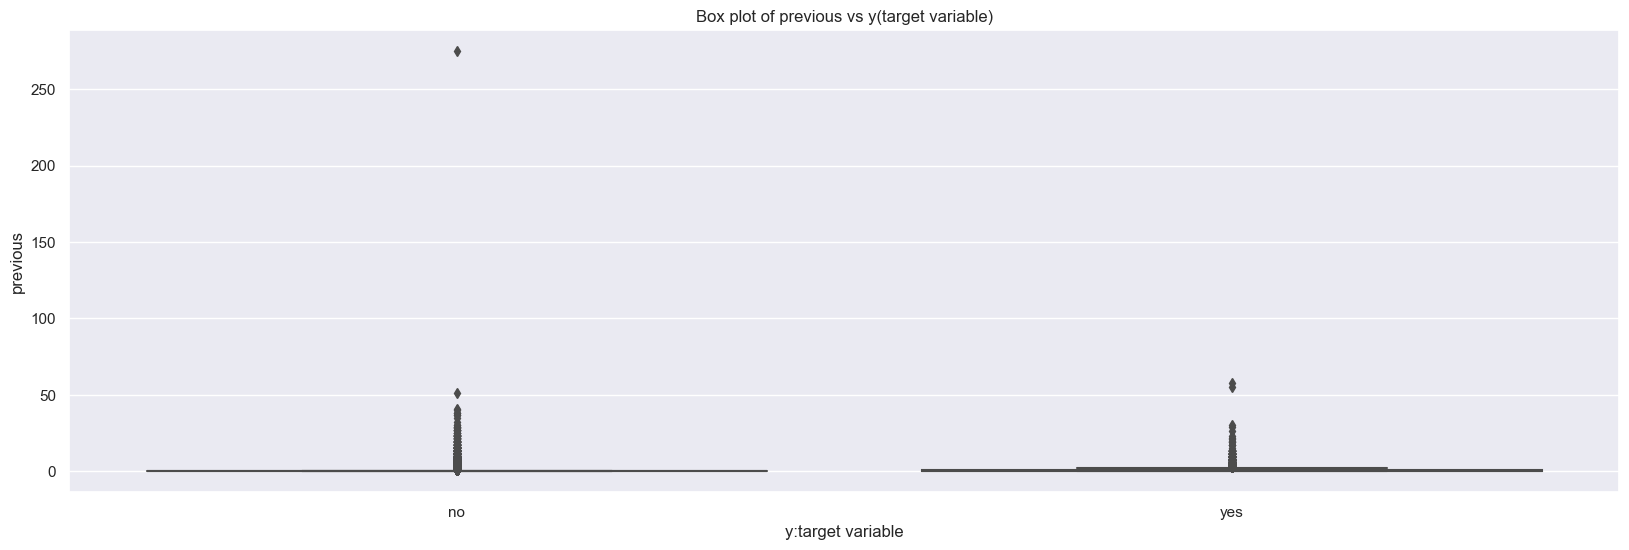

In [357]:
sns.boxplot(y=data['previous'], x=data['Target'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

C:\Users\maity\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\maity\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'PDF of previous values for target variable y')

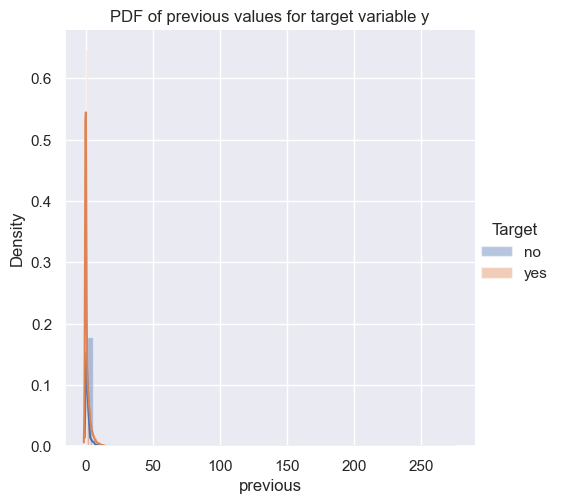

In [358]:
sns.FacetGrid(data, hue='Target', height=5) \
.map(sns.distplot, 'previous') \
.add_legend()
plt.title('PDF of previous values for target variable y')

In [359]:
data.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [360]:
for x in range(95, 101 , 1):
    print("{}% of previous values less than equal to {}".format(x, data.previous.quantile(x/100)))
iqr = data.previous.quantile(0.75) - data.previous.quantile(0.25)
print('IQR {}'.format(iqr))

95% of previous values less than equal to 3.0
96% of previous values less than equal to 4.0
97% of previous values less than equal to 5.0
98% of previous values less than equal to 6.0
99% of previous values less than equal to 8.900000000001455
100% of previous values less than equal to 275.0
IQR 0.0


Observation:

75% of previous values equal 0 and 99% values <= 8.90


duration have a mean of 0.58 and standard-deviation 2.30


There are outliers points in duration.

# Age

Text(0.5, 0, 'y:target variable')

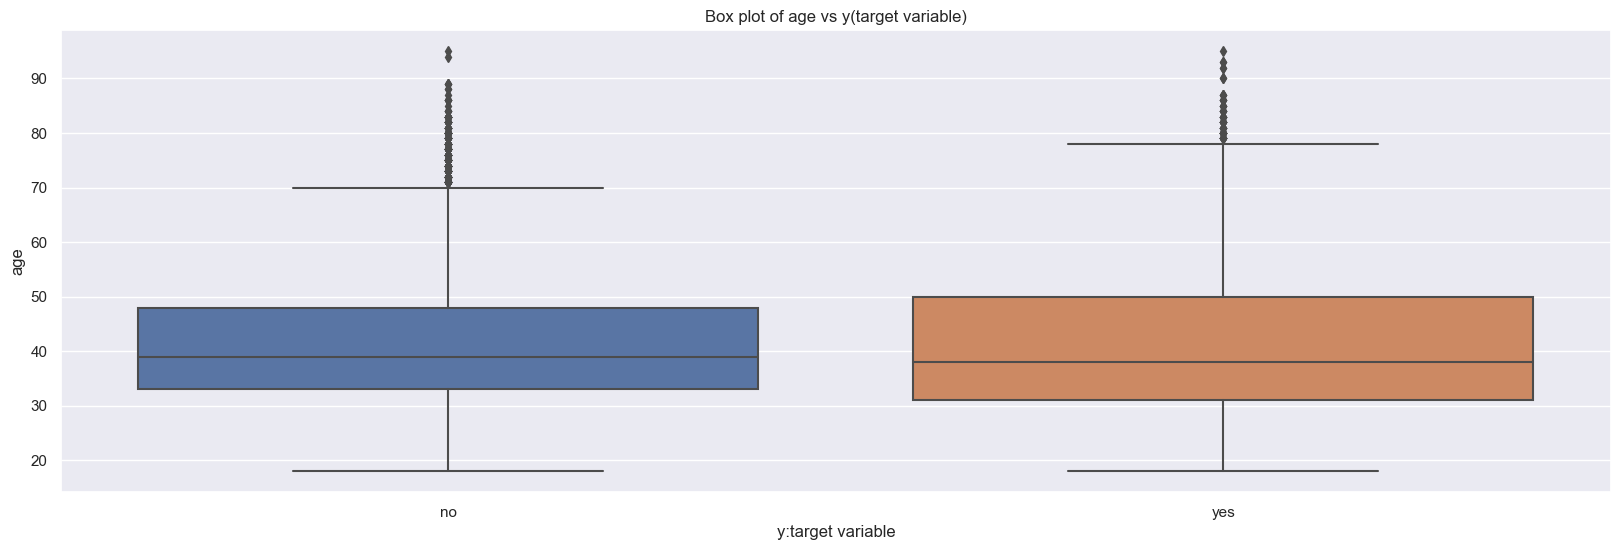

In [361]:
sns.boxplot(y=data['age'], x=data['Target'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

C:\Users\maity\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\maity\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'PDF of age for target variable y')

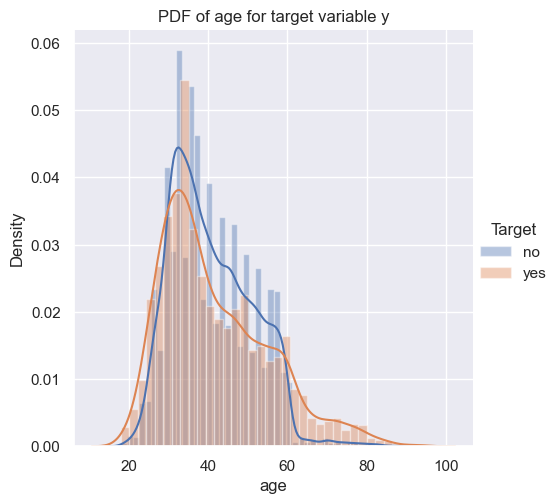

In [362]:
sns.FacetGrid(data, hue='Target', height=5) \
.map(sns.distplot, 'age') \
.add_legend()
plt.title('PDF of age for target variable y')

In [363]:
data.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [364]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, data.age.quantile(x/100)))
iqr = data.age.quantile(0.75) - data.age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 59.0
96% of people having age are less than equal to 59.0
97% of people having age are less than equal to 60.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 71.0
100% of people having age are less than equal to 95.0
IQR 15.0


In [365]:
lst = [data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 30
    column.loc[(column["age"] >= 30) & (column["age"] <= 44), 'age_group'] = 40
    column.loc[(column["age"] >= 45) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60

In [366]:
count_age_response_pct = pd.crosstab(data['Target'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose()

<Axes: xlabel='age_group', ylabel='count'>

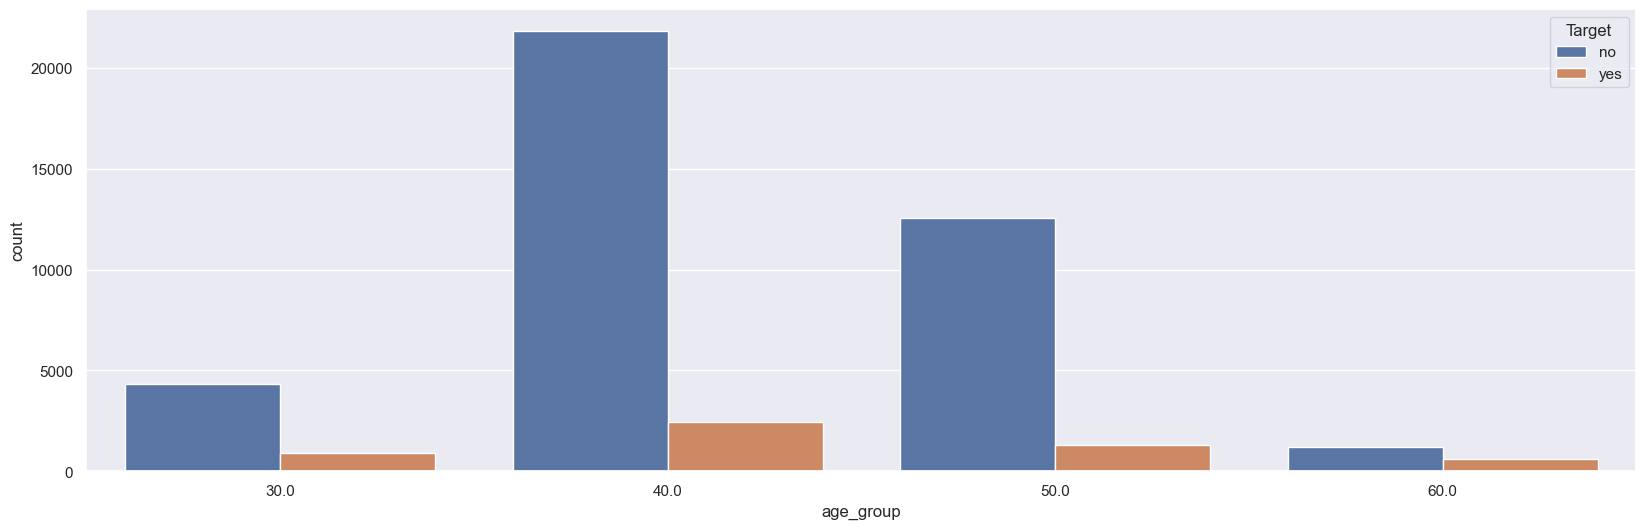

In [367]:
sns.countplot(x='age_group', data=data, hue='Target')

In [368]:
print('Success rate and total clients contacted for different age_groups:')
print('Clients age < 30 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 30]), data[data['age_group'] == 30].Target.value_counts()[1]/len(data[data['age_group'] == 30])))
print('Clients of age 30-45 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 40]), data[data['age_group'] == 40].Target.value_counts()[1]/len(data[data['age_group'] == 40])))
print('Clients of age 40-60 contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 50]), data[data['age_group'] == 50].Target.value_counts()[1]/len(data[data['age_group'] == 50])))
print('Clients of 60+ age contacted: {}, Success rate: {}'.format(len(data[data['age_group'] == 60]), data[data['age_group'] == 60].Target.value_counts()[1]/len(data[data['age_group']==60])))

Success rate and total clients contacted for different age_groups:
Clients age < 30 contacted: 5273, Success rate: 0.1759908970225678
Clients of age 30-45 contacted: 24274, Success rate: 0.10117821537447474
Clients of age 40-60 contacted: 13880, Success rate: 0.09402017291066282
Clients of 60+ age contacted: 1784, Success rate: 0.336322869955157


Observation:

People with age < 30 or 60+ have higher success rate.



Only 3% of clients have age of 60+

# Job

In [369]:
data.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Text(0.5, 1.0, 'Count Plot of job for target variable')

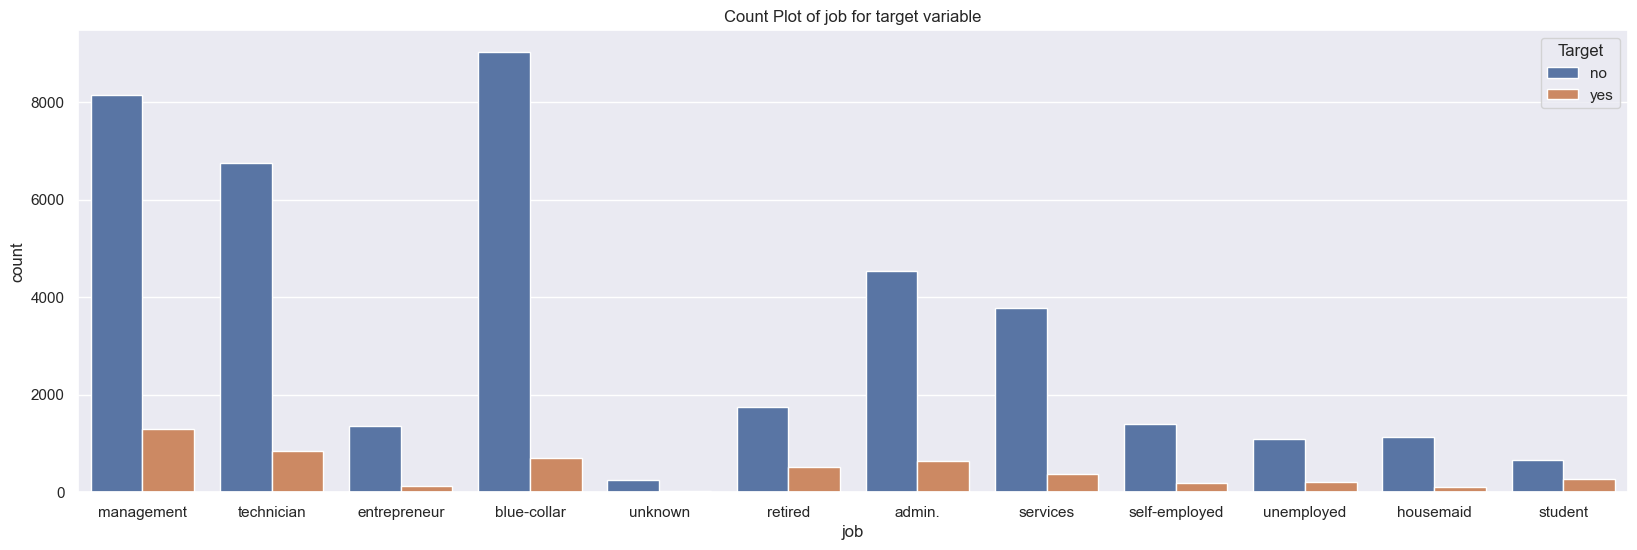

In [370]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(x=data['job'], data=data, hue=data['Target'])
plt.title('Count Plot of job for target variable')

In [371]:
table = PrettyTable(['Job', 'Total Clients', 'Success rate'])
table.add_row(['Blue-collar', len(data[data['job'] == 'blue-collar']), data[data['job'] == 'blue-collar'].Target.value_counts()[1]/len(data[data['job'] == 'blue-collar'])])
table.add_row(['Management', len(data[data['job'] == 'management']), data[data['job'] == 'management'].Target.value_counts()[1]/len(data[data['job'] == 'management'])])
table.add_row(['Technician', len(data[data['job'] == 'technician']), data[data['job'] == 'technician'].Target.value_counts()[1]/len(data[data['job'] == 'technician'])])
table.add_row(['Admin', len(data[data['job'] == 'admin.']), data[data['job'] == 'admin.'].Target.value_counts()[1]/len(data[data['job'] == 'admin.'])])
table.add_row(['Services', len(data[data['job'] == 'services']), data[data['job'] == 'services'].Target.value_counts()[1]/len(data[data['job'] == 'services'])])
table.add_row(['Retired', len(data[data['job'] == 'retired']), data[data['job'] == 'retired'].Target.value_counts()[1]/len(data[data['job'] == 'retired'])])
table.add_row(['Self-employed', len(data[data['job'] == 'self-employed']), data[data['job'] == 'self-employed'].Target.value_counts()[1]/len(data[data['job'] == 'self-employed'])])
table.add_row(['Entrepreneur', len(data[data['job'] == 'entrepreneur']), data[data['job'] == 'entrepreneur'].Target.value_counts()[1]/len(data[data['job'] == 'entrepreneur'])])
table.add_row(['Unemployed', len(data[data['job'] == 'unemployed']), data[data['job'] == 'unemployed'].Target.value_counts()[1]/len(data[data['job'] == 'unemployed'])])
table.add_row(['Housemaid', len(data[data['job'] == 'housemaid']), data[data['job'] == 'housemaid'].Target.value_counts()[1]/len(data[data['job'] == 'housemaid'])])
table.add_row(['Student', len(data[data['job'] == 'student']), data[data['job'] == 'student'].Target.value_counts()[1]/len(data[data['job'] == 'student'])])
table.add_row(['Unknown', len(data[data['job'] == 'unknown']), data[data['job'] == 'unknown'].Target.value_counts()[1]/len(data[data['job'] == 'unknown'])])
print(table)

+---------------+---------------+---------------------+
|      Job      | Total Clients |     Success rate    |
+---------------+---------------+---------------------+
|  Blue-collar  |      9732     | 0.07274969173859433 |
|   Management  |      9458     | 0.13755550856417847 |
|   Technician  |      7597     | 0.11056996182703699 |
|     Admin     |      5171     | 0.12202668729452718 |
|    Services   |      4154     | 0.08883004333172845 |
|    Retired    |      2264     | 0.22791519434628976 |
| Self-employed |      1579     | 0.11842938568714376 |
|  Entrepreneur |      1487     | 0.08271687962340282 |
|   Unemployed  |      1303     | 0.15502686108979277 |
|   Housemaid   |      1240     | 0.08790322580645162 |
|    Student    |      938      |  0.2867803837953092 |
|    Unknown    |      288      | 0.11805555555555555 |
+---------------+---------------+---------------------+


Observation:

Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'
Success rate is highest for student

# poutcome

In [372]:
data.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

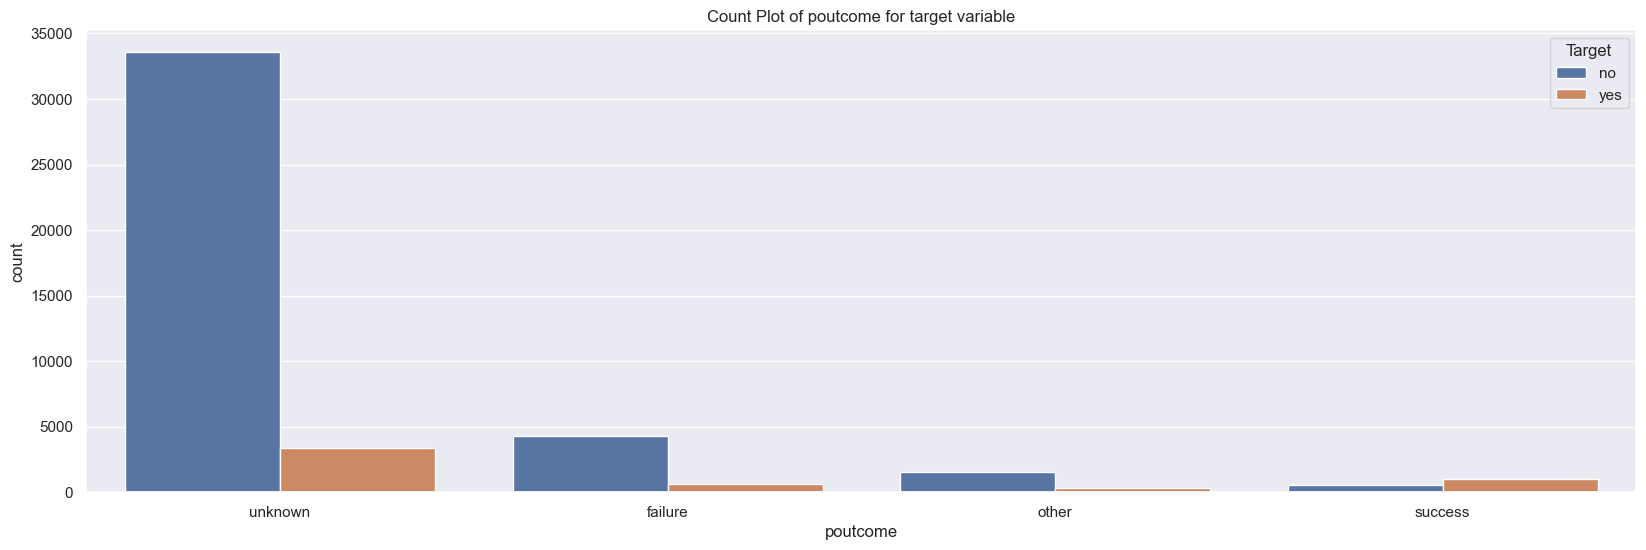

In [373]:
sns.countplot(x=data['poutcome'], data=data, hue=data['Target'])
plt.title('Count Plot of poutcome for target variable')

Observation:

Most of the clients contacted have previous outcome as 'unknown'.

# Education

In [374]:
data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Text(0.5, 1.0, 'Count plot of education for target variable y')

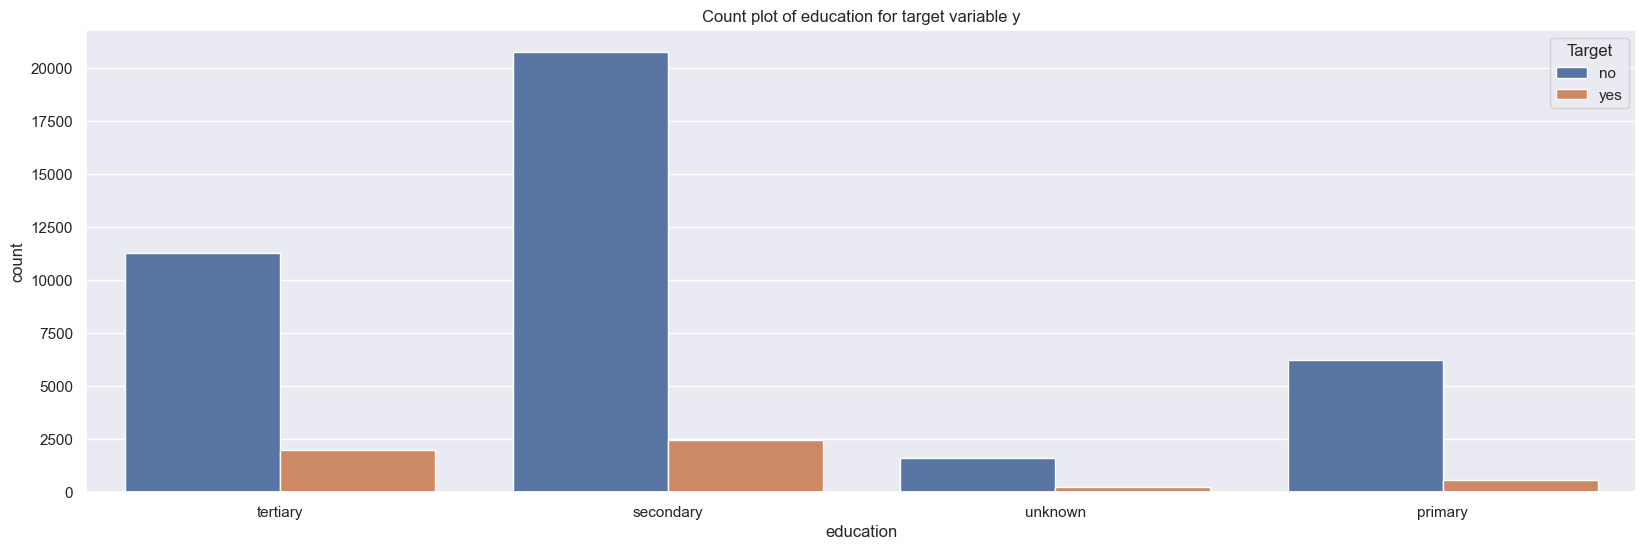

In [375]:
sns.countplot(x=data['education'], data=data, hue=data['Target'])
plt.title('Count plot of education for target variable y')

# default

In [376]:
data.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

Text(0.5, 1.0, 'Count plot of default for target variable y')

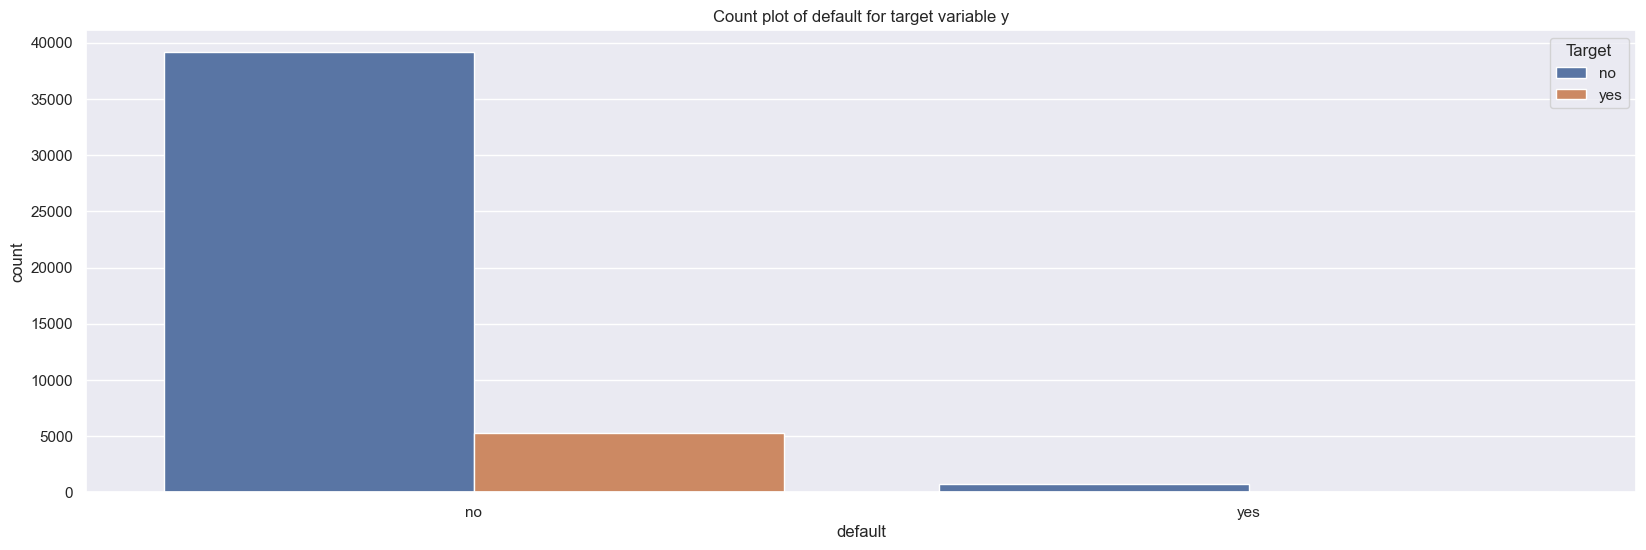

In [377]:
sns.countplot(x=data['default'], data=data, hue=data['Target'])
plt.title('Count plot of default for target variable y')

In [378]:
data[data['default'] == 'yes'].Target.count()

815

Observation:

Very few clients are contacted who are defaulter

# loan

In [379]:
data.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

Text(0.5, 1.0, 'Count plot of loan for target variable y')

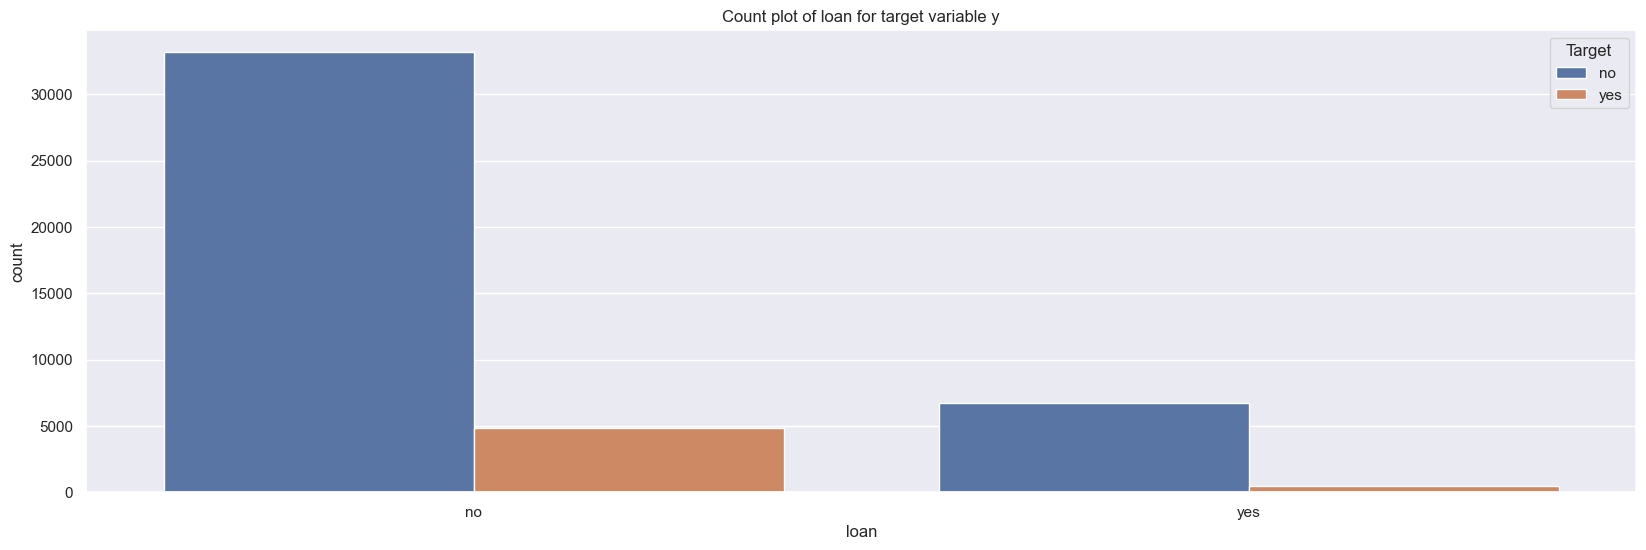

In [380]:
sns.countplot(x=data['loan'], data=data, hue=data['Target'])
plt.title('Count plot of loan for target variable y')

Observation:

As seen for default variable, less client are contacted who have loan.

# Contact

In [381]:
data.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Text(0.5, 1.0, 'Count plot of contact for target variable y')

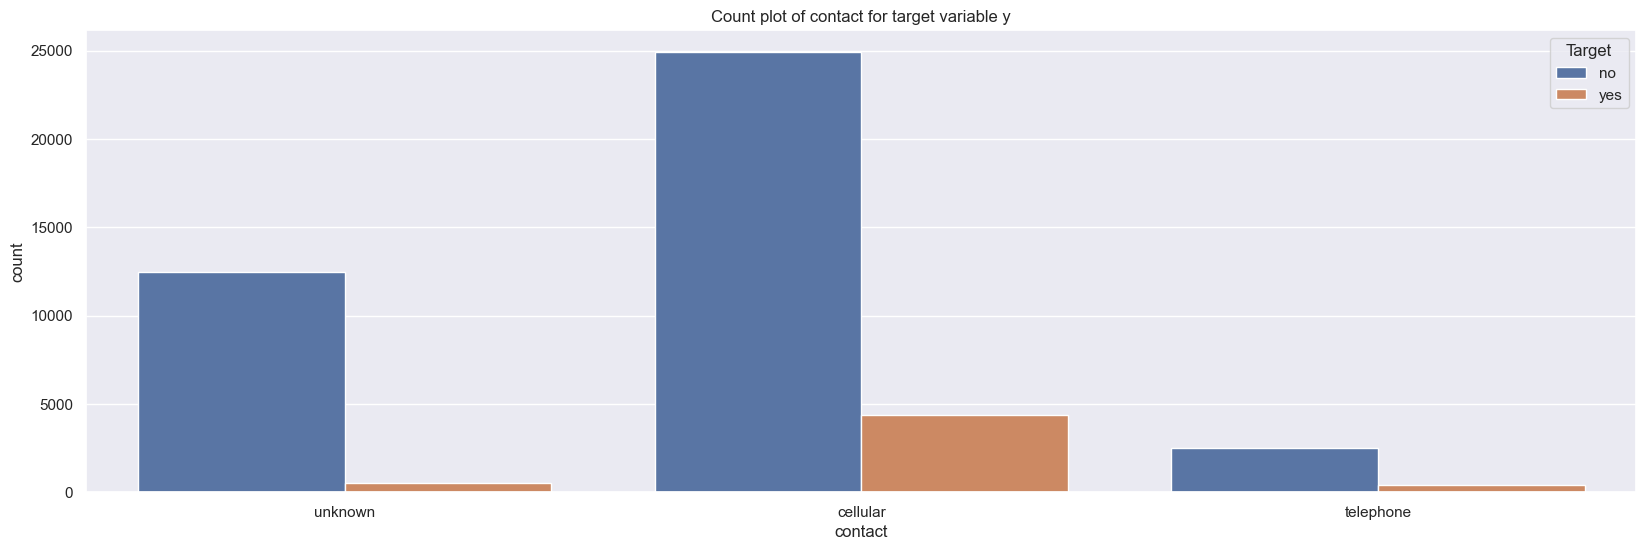

In [382]:
sns.countplot(x=data['contact'], data=data, hue=data['Target'])
plt.title('Count plot of contact for target variable y')

Observation:

Most of the people are contacted through cellular

# month

In [383]:
data.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Text(0.5, 1.0, 'Count plot of month for target variable y')

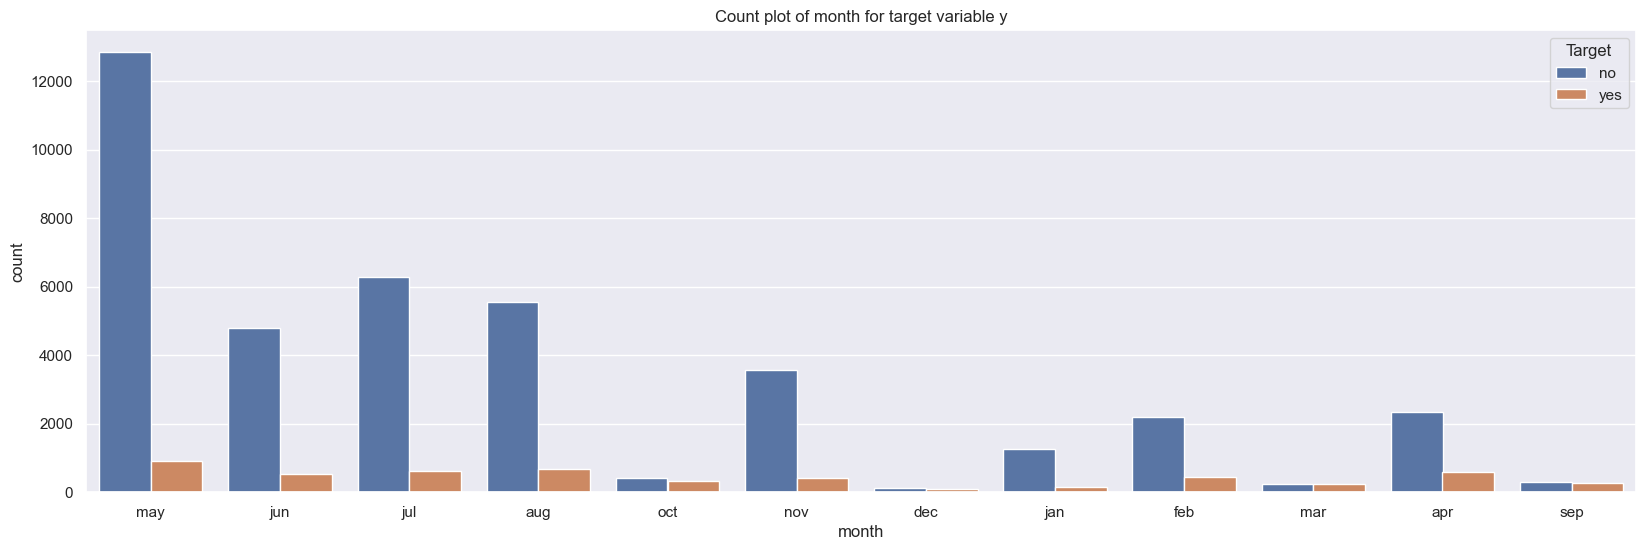

In [384]:
sns.countplot(x=data['month'], data=data, hue=data['Target'])
plt.title('Count plot of month for target variable y')

In [385]:
data[data['month'] == 'jan'].Target.value_counts()

no     1261
yes     142
Name: Target, dtype: int64

In [386]:
print('Success rate and total clients contacted for different months:')
print('Clients contacted in January: {}, Success rate: {}'.format(len(data[data['month'] == 'jan']), data[data['month'] == 'jan'].Target.value_counts()[1]/len(data[data['month'] == 'jan'])))
print('Clients contacted in February: {}, Success rate: {}'.format(len(data[data['month'] == 'feb']), data[data['month'] == 'feb'].Target.value_counts()[1]/len(data[data['month'] == 'feb'])))
print('Clients contacted in March: {}, Success rate: {}'.format(len(data[data['month'] == 'mar']), data[data['month'] == 'mar'].Target.value_counts()[1]/len(data[data['month'] == 'mar'])))
print('Clients contacted in April: {}, Success rate: {}'.format(len(data[data['month'] == 'apr']), data[data['month'] == 'apr'].Target.value_counts()[1]/len(data[data['month'] == 'apr'])))
print('Clients contacted in May: {}, Success rate: {}'.format(len(data[data['month'] == 'may']), data[data['month'] == 'may'].Target.value_counts()[1]/len(data[data['month'] == 'may'])))
print('Clients contacted in June: {}, Success rate: {}'.format(len(data[data['month'] == 'jun']), data[data['month'] == 'jun'].Target.value_counts()[1]/len(data[data['month'] == 'jun'])))
print('Clients contacted in July: {}, Success rate: {}'.format(len(data[data['month'] == 'jul']), data[data['month'] == 'jul'].Target.value_counts()[1]/len(data[data['month'] == 'jul'])))
print('Clients contacted in August: {}, Success rate: {}'.format(len(data[data['month'] == 'aug']), data[data['month'] == 'aug'].Target.value_counts()[1]/len(data[data['month'] == 'aug'])))
print('Clients contacted in September: {}, Success rate: {}'.format(len(data[data['month'] == 'sep']), data[data['month'] == 'sep'].Target.value_counts()[1]/len(data[data['month'] == 'sep'])))
print('Clients contacted in October: {}, Success rate: {}'.format(len(data[data['month'] == 'oct']), data[data['month'] == 'oct'].Target.value_counts()[1]/len(data[data['month'] == 'oct'])))
print('Clients contacted in November: {}, Success rate: {}'.format(len(data[data['month'] == 'nov']), data[data['month'] == 'nov'].Target.value_counts()[1]/len(data[data['month'] == 'nov'])))
print('Clients contacted in December: {}, Success rate: {}'.format(len(data[data['month'] == 'dec']), data[data['month'] == 'dec'].Target.value_counts()[1]/len(data[data['month']=='dec'])))

Success rate and total clients contacted for different months:
Clients contacted in January: 1403, Success rate: 0.10121168923734854
Clients contacted in February: 2649, Success rate: 0.1664779161947905
Clients contacted in March: 477, Success rate: 0.480083857442348
Clients contacted in April: 2932, Success rate: 0.19679399727148705
Clients contacted in May: 13766, Success rate: 0.06719453726572715
Clients contacted in June: 5341, Success rate: 0.10222804718217562
Clients contacted in July: 6895, Success rate: 0.09093546047860769
Clients contacted in August: 6247, Success rate: 0.11013286377461182
Clients contacted in September: 579, Success rate: 0.46459412780656306
Clients contacted in October: 738, Success rate: 0.43766937669376693
Clients contacted in November: 3970, Success rate: 0.10151133501259446
Clients contacted in December: 214, Success rate: 0.4672897196261682


Observation:

Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.

March have highest success rate.

# pairplot

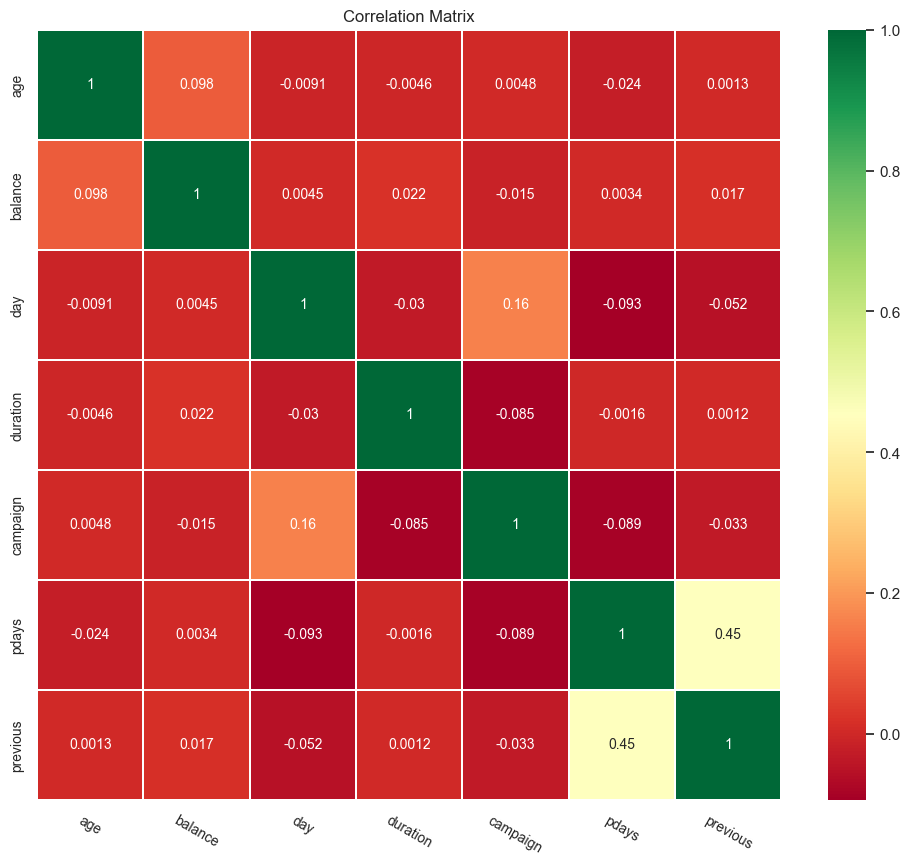

In [387]:
corr_data = data[num + ['Target']]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()


In [388]:
sns.pairplot(data, hue='Target')

Observation:

Over numerical features have very less correlation between them.

pdays and previous have higher correlation

duration have a higher correlation with our target variable

# Outlier detection for numerical attributes using IQR

In [389]:
data_numerical = data[num]
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (45211, 7)


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,4.350000,1,-1,0
1,44,29,5,2.516667,1,-1,0
2,33,2,5,1.266667,1,-1,0
3,47,1506,5,1.533333,1,-1,0
4,33,1,5,3.300000,1,-1,0


In [390]:
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
age           15.0
balance     1356.0
day           13.0
duration       3.6
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [391]:
data = data[~((data_numerical < (q1 - 3.0 * iqr)) |(data_numerical > (q3 + 3.0 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(data.shape[0] - data.shape[0]))

0 points are outliers based on IQR


In [392]:
data.shape

(32767, 18)

In [393]:
data['Target'].value_counts()/ len(data)

no     0.921751
yes    0.078249
Name: Target, dtype: float64

# Preprocessing

In [394]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

In [395]:
num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [396]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [397]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [398]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [399]:
data['default'].unique()

array(['no', 'yes'], dtype=object)

In [400]:
data['housing'].unique()

array(['yes', 'no'], dtype=object)

In [401]:
data['loan'].unique()

array(['no', 'yes'], dtype=object)

In [402]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [403]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [404]:
data['poutcome'].unique()

array(['unknown'], dtype=object)

In [405]:
data['Target'].unique()

array(['no', 'yes'], dtype=object)

In [406]:
data = pd.get_dummies(data=data, columns=['job',
 'marital',
 'education',
 'contact',
 'month',
 'poutcome','age_group'])

In [407]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['default']= label_encoder.fit_transform(data['default'])
data['default'].unique()

array([0, 1])

In [408]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['housing']= label_encoder.fit_transform(data['housing'])
data['housing'].unique()

array([1, 0])

In [409]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['loan']= label_encoder.fit_transform(data['loan'])
data['loan'].unique()

array([0, 1])

In [410]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Target']= label_encoder.fit_transform(data['Target'])
data['Target'].unique()

array([0, 1])

In [411]:
data['Target'].value_counts()/ len(data)

0    0.921751
1    0.078249
Name: Target, dtype: float64

In [412]:
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown,age_group_30.0,age_group_40.0,age_group_50.0,age_group_60.0
0,58,0,2143,1,0,5,4.350000,1,-1,0,...,0,1,0,0,0,1,0,0,1,0
1,44,0,29,1,0,5,2.516667,1,-1,0,...,0,1,0,0,0,1,0,1,0,0
2,33,0,2,1,1,5,1.266667,1,-1,0,...,0,1,0,0,0,1,0,1,0,0
3,47,0,1506,1,0,5,1.533333,1,-1,0,...,0,1,0,0,0,1,0,0,1,0
4,33,0,1,0,0,5,3.300000,1,-1,0,...,0,1,0,0,0,1,0,1,0,0


In [413]:
data.shape

(32767, 50)

In [414]:
data['Target'].value_counts()

0    30203
1     2564
Name: Target, dtype: int64

# balance the Target label

In [415]:
from sklearn.utils import resample 
df_majority = data[(data['Target']==0)] 
df_minority = data[(data['Target']==1)] 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    
                                 n_samples= 30203, 
                                 random_state=42)  
data = pd.concat([df_minority_upsampled, df_majority])

print(data['Target'].value_counts()/ len(data))

1    0.5
0    0.5
Name: Target, dtype: float64


Text(0.5, 0, 'Target class')

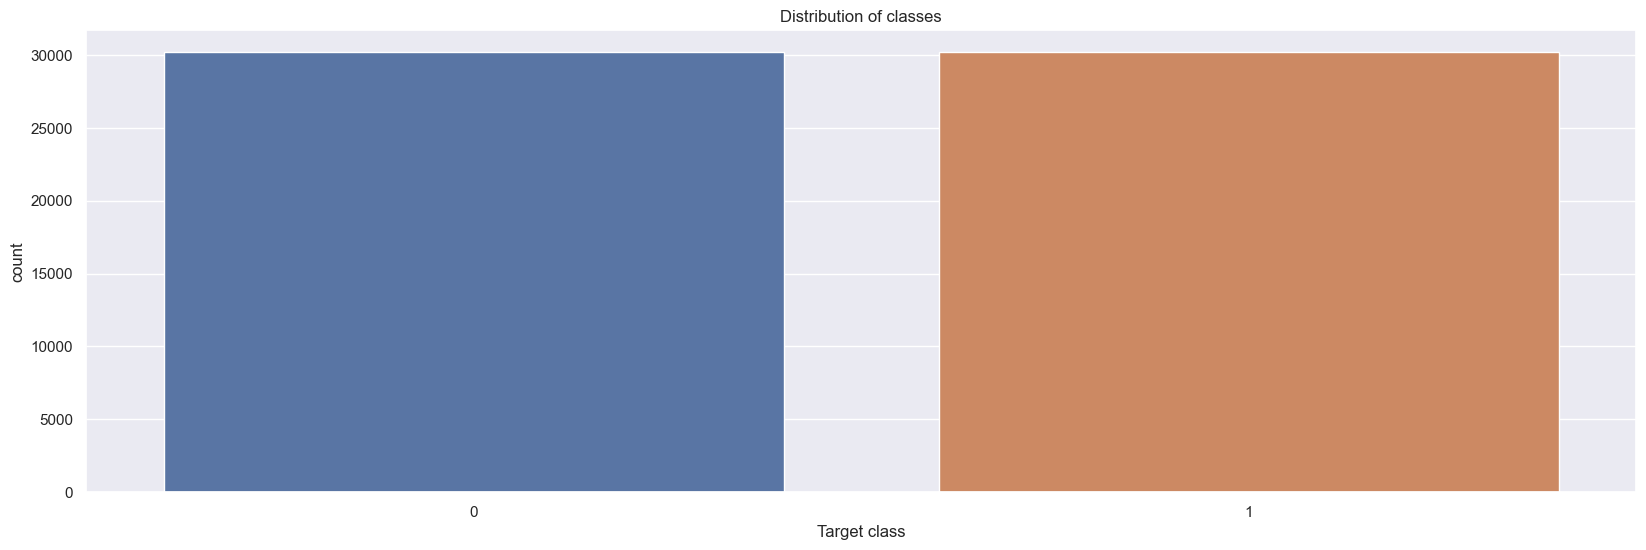

In [416]:
from matplotlib import pyplot as plt
sns.countplot(x=data['Target'])
plt.title('Distribution of classes')
plt.xlabel('Target class')

In [417]:
data.shape

(60406, 50)

In [418]:
data.drop('age',axis=1,inplace = True)

<Axes: >

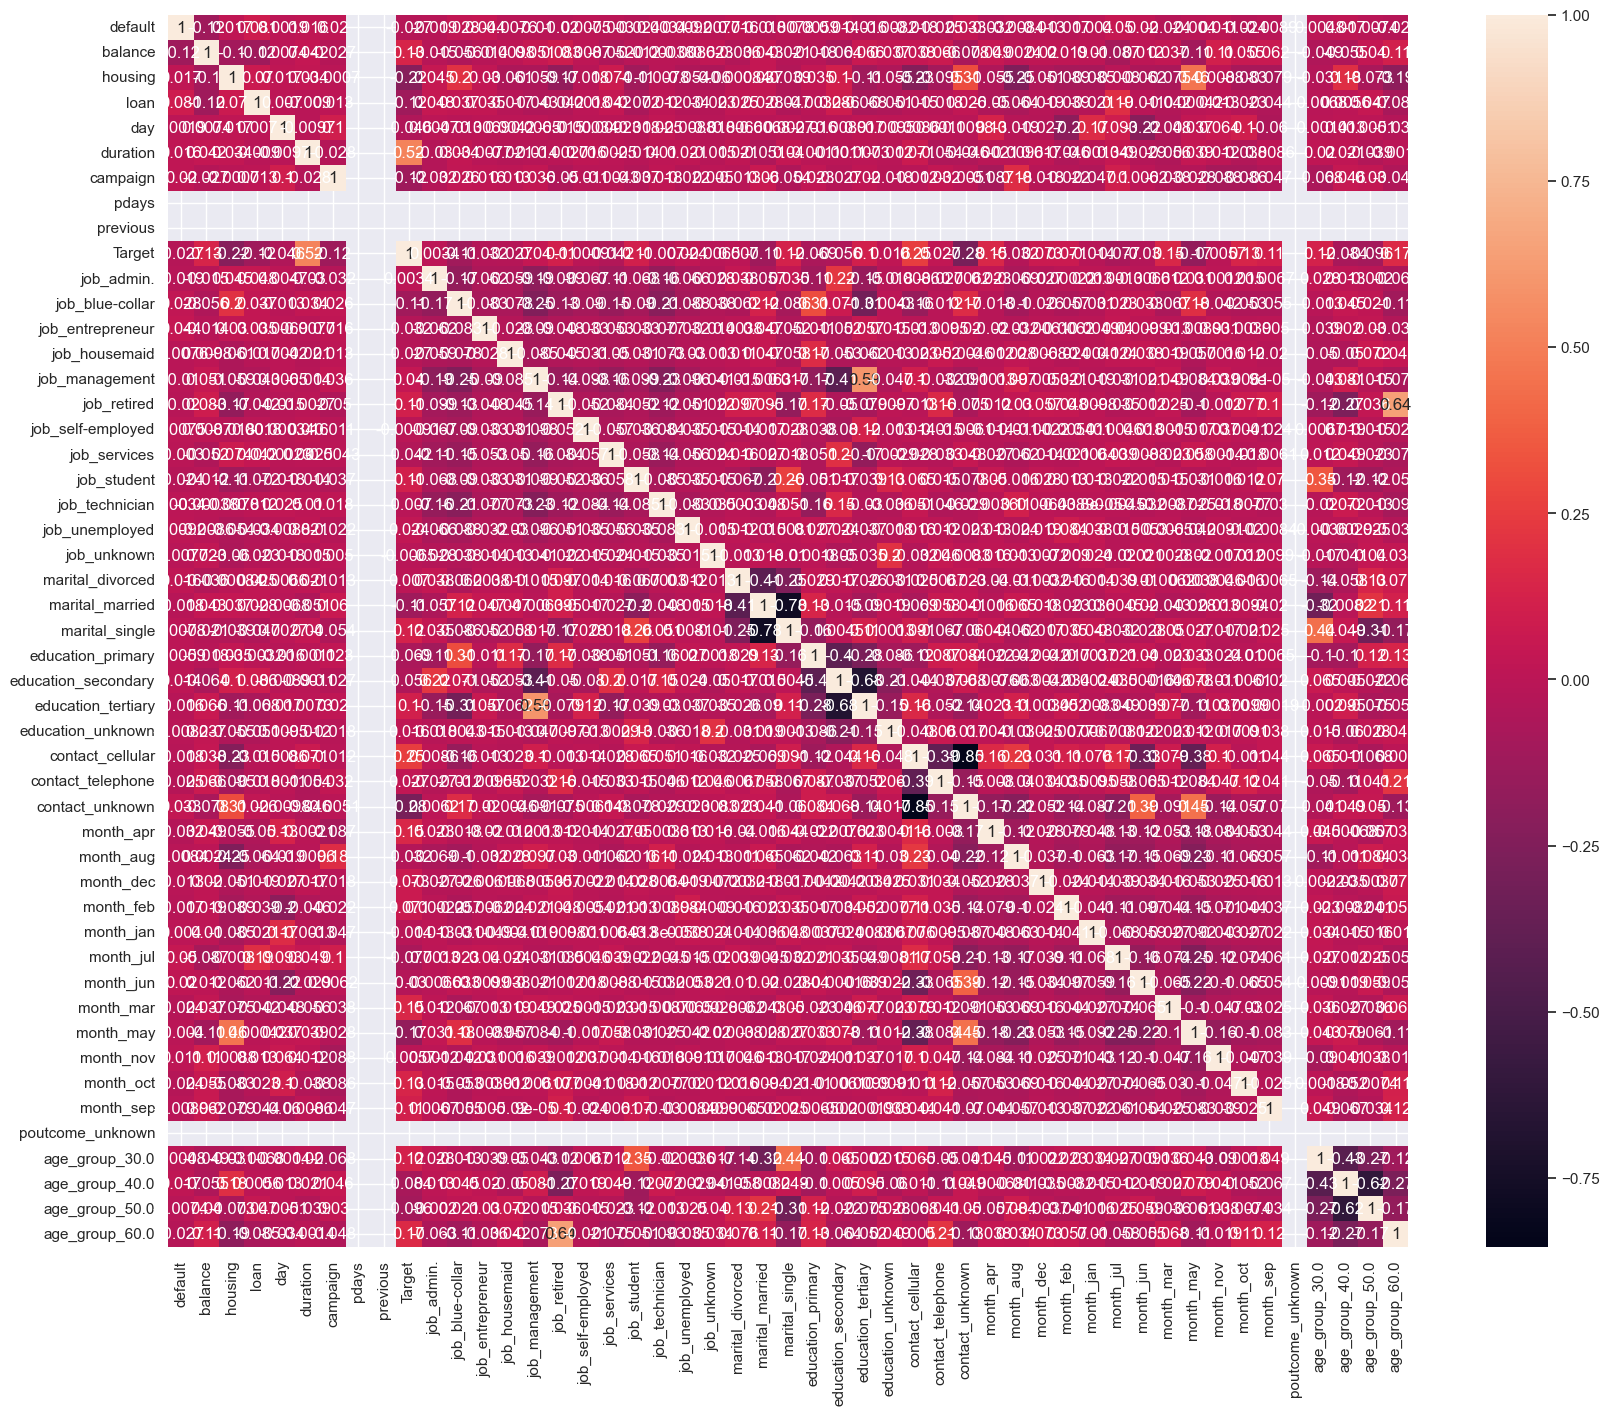

In [419]:
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(),fmt = '.2g',annot = True)

# feature selection

[0.00403047 0.06957651 0.03490527 0.01752533 0.07986449 0.29285913
 0.05306298 0.         0.         0.01192415 0.01179766 0.00551216
 0.00432844 0.0128911  0.00730467 0.0058965  0.00980999 0.00511164
 0.01363237 0.00614956 0.0013634  0.00868841 0.01324228 0.0128044
 0.00996474 0.01336566 0.01237475 0.00601379 0.02610579 0.0061866
 0.04006684 0.01746411 0.0159264  0.00319322 0.0106194  0.00670182
 0.01841823 0.01597098 0.01493607 0.01512398 0.01135273 0.01394058
 0.00594734 0.         0.01244083 0.01371212 0.01341444 0.01447867]


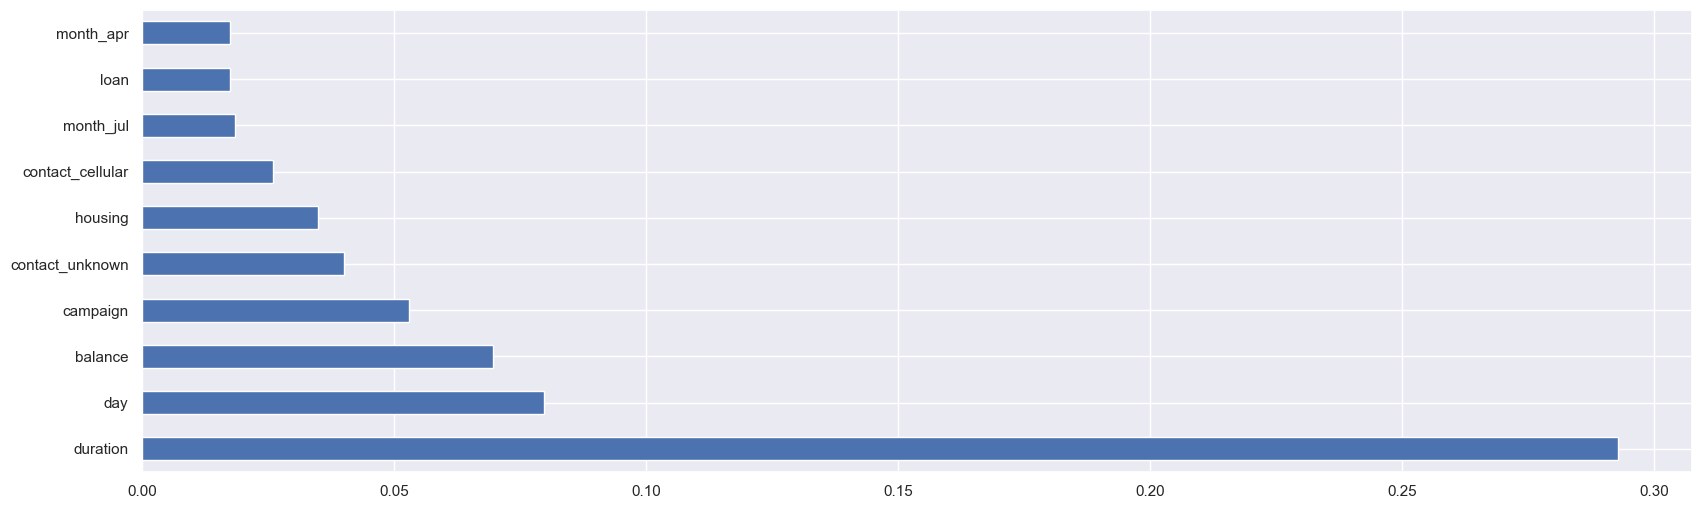

In [420]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
X = data.drop("Target", axis=1)
y = data["Target"]
model.fit(X, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# normalization

In [421]:
num1 = ['balance', 'day', 'duration', 'campaign', 'pdays']

In [422]:
# # apply normalization techniques
for column  in num1:
     data[column] = data[column]  / data[column].abs().max()


In [423]:
data.shape

(60406, 49)

# machine learning model building

In [424]:
x = data[['duration','day', 'balance', 'contact_unknown','campaign','housing','contact_cellular','month_apr','loan','month_jul']]
y = data['Target']

In [425]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [426]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (48324, 10) (48324,)
Test data shape (12082, 10) (12082,)


# Decesion Tree

In [427]:
dtree = DecisionTreeClassifier(max_depth = 6)
dtree.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=6)

In [428]:
y_pred = dtree.predict(x_test)
print("accuracy score:",round(accuracy_score(y_test,y_pred)*100,2),"%")

accuracy score: 81.85 %


In [429]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4582, 1482],
       [ 711, 5307]], dtype=int64)

In [430]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree,0.81849,0.781706,0.881854,0.828766,0.818731


C:\Users\maity\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


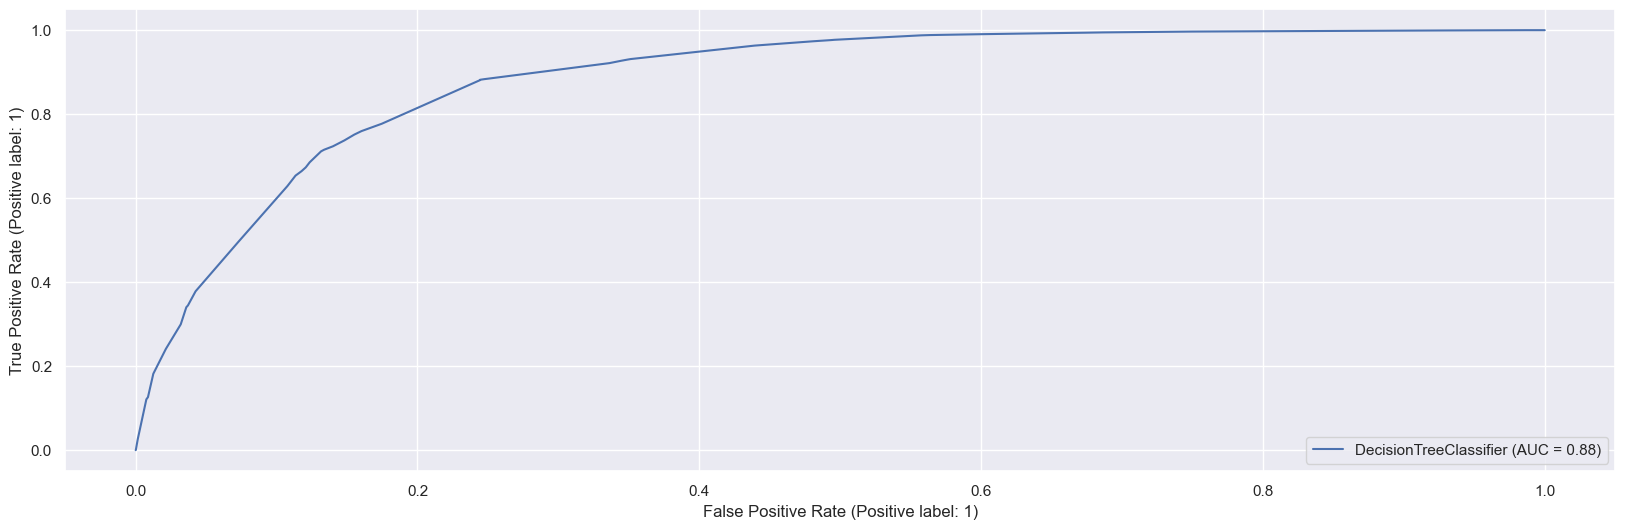

In [431]:
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(dtree, x_test, y_test)
plt.show()

# logistic 

In [432]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=1)
logmodel.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [433]:
y_pred = logmodel.predict(x_test)

In [434]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4867, 1197],
       [1131, 4887]], dtype=int64)

In [435]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.807317,0.803254,0.812064,0.807635,0.807335


C:\Users\maity\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


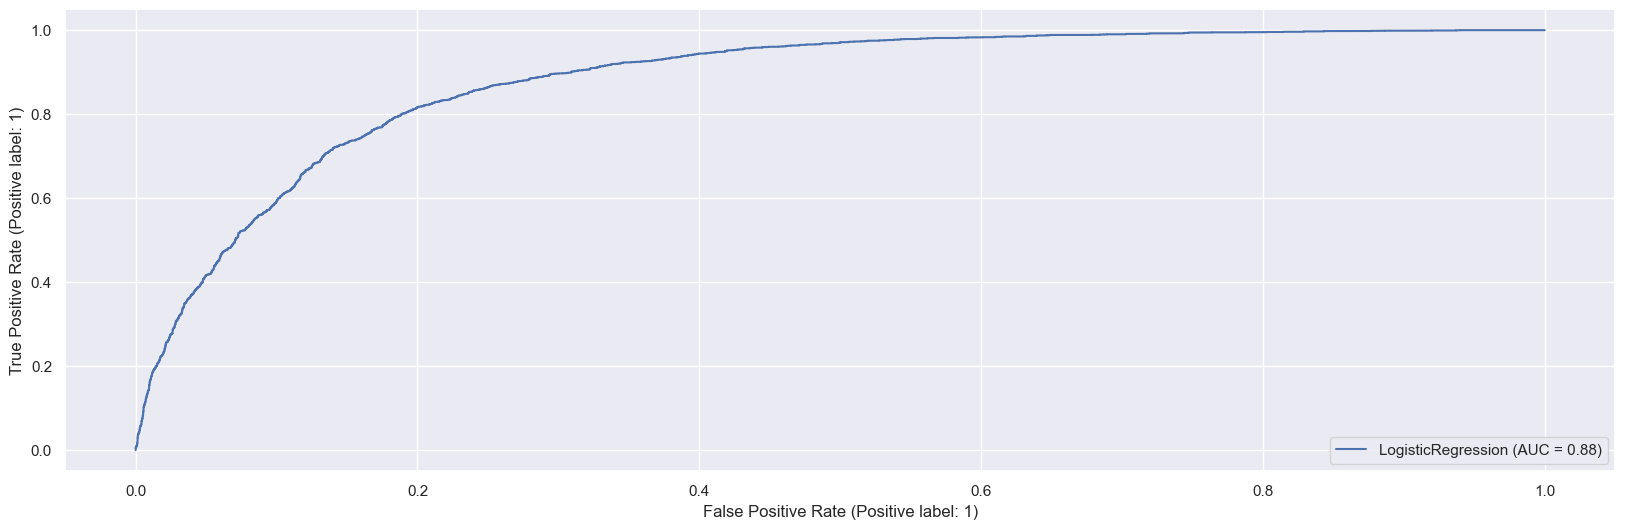

In [436]:
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(logmodel, x_test, y_test)
plt.show()

# grid search

In [437]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

In [438]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

In [439]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='f1',cv=20,n_jobs=-1,verbose = 2)

grid_search_log = grid_search.fit(x_train,y_train)
best_accuracy = grid_search_log.best_score_
print('Accuracy on Cross Validation set :',best_accuracy)

Fitting 20 folds for each of 20 candidates, totalling 400 fits


C:\Users\maity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maity\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maity\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\maity\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
V

Accuracy on Cross Validation set : 0.8084401865393073


In [440]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [441]:
y_pred_log = grid_search_log.predict(x_test)
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.807896,0.80358,0.813061,0.808293,0.807916


# Randomforest

In [442]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0,max_depth = 4)

In [443]:
rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_depth=4, random_state=0)

In [444]:
y_pred = rfc.predict(x_test)

In [445]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4736, 1328],
       [ 854, 5164]], dtype=int64)

In [446]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.819401,0.795441,0.858092,0.82558,0.819548


C:\Users\maity\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


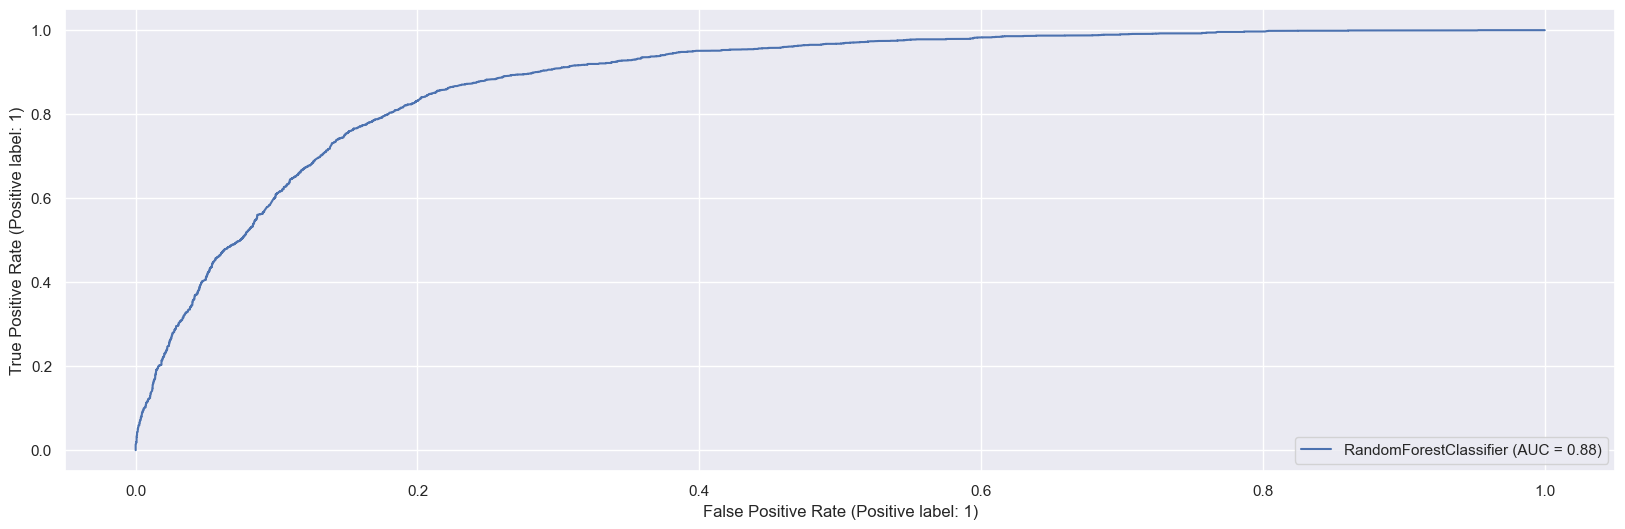

In [447]:
import matplotlib.pyplot as plt
from sklearn import metrics
metrics.plot_roc_curve(rfc, x_test, y_test)
plt.show()

# KNN Clasifier

In [448]:
from sklearn.neighbors import KNeighborsClassifier

C:\Users\maity\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\maity\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

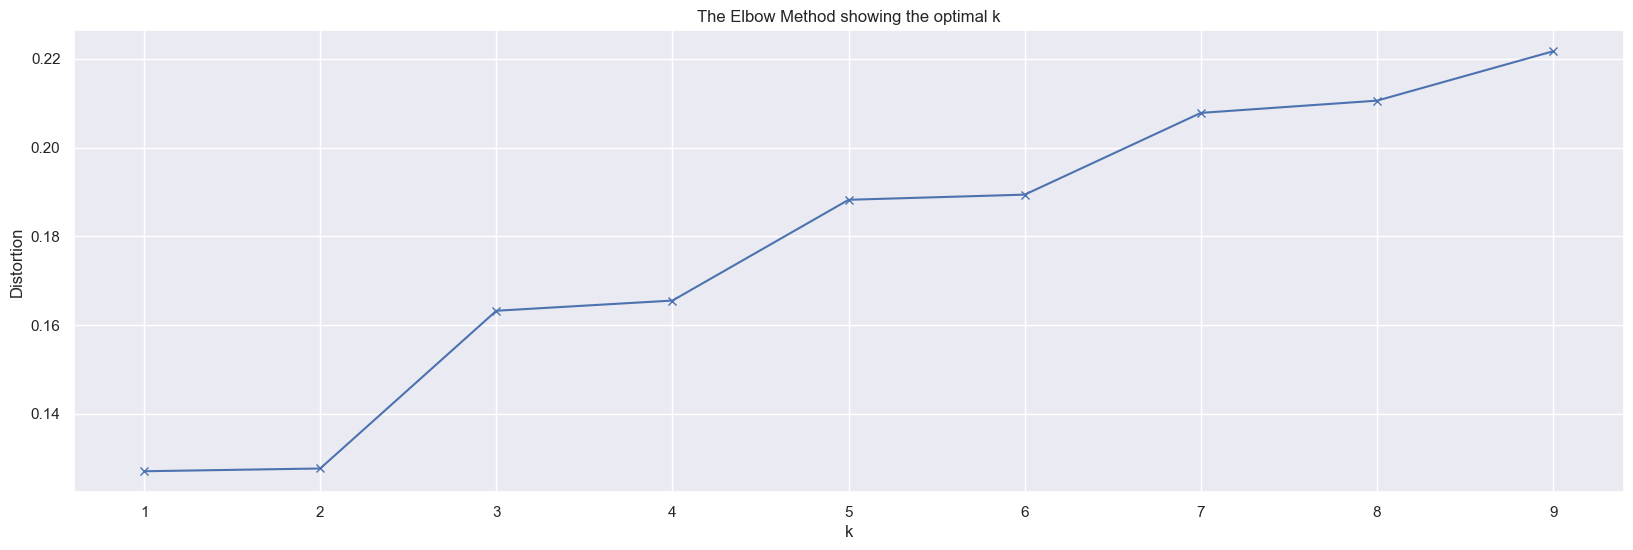

In [449]:
import math
from sklearn.metrics import mean_squared_log_error

distortions = []
K = range(1,10)
for k in K:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    distortions.append(math.sqrt(mean_squared_log_error(y_test, y_pred)))

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [450]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')
knn_model = knn.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)

C:\Users\maity\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [451]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Knn', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Knn,0.966065,0.93676,0.999335,0.967037,0.966191
